<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M1_GeoPandas_Part1_V8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to GeoPandas in Python

#### Table of Content:

1.   **GeoPandas Data Structuers**
2.   **Reading and wrinting GeoData**
3.   **Accessing and selecting GeoPandas**
4.   **Merging Data**
5.   **Geometric Manipulations**
6.   **Aggregation with dissolve**
7.   Set operations with overlay
8.   Interactive mapping


####Setup and Requirements
To get started, we need to install the required libraries. Execute the following commands to install them.

In [ ]:
!pip install geopandas --q
!pip install geoplot --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 19.9 MB/s eta 0:00:00


Now let's import the libraries we will be using.


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt


## 1. GeoPandas Data Structures

GeoPandas extends Pandas and introduces two primary data structures: GeoSeries and GeoDataFrame.

**Geometric Objects:**

- Points: Individual points in space.
- Lines: Connected sequences of points.
- Polygons: Closed shapes formed by lines.

Polygons are made up of Lines, and Lines are made up of Points. A GeoDataFrame can store one or more of these types of geometric objects.

![image.png](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/point_line_polygon.jpg)


GeoDatatFrame as the core data structure of GeoPandas can store geometric GeoSeries in a column and apply spatial operations to it. This geometry GeoSeries can be including Points, Lines, or Polygons.

![image.png](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/geodataframe.png)

For this tutorial, we will be working with geodata on [Seattle neighborhoods](https://github.com/aaubs/ds-master/blob/main/data/Neighborhood_Map_Atlas_Districts.geojson) and [Seattle public schools](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Public_Schools.geojson).


## 2. Reading and Writing GeoData

For reading and writing spatial data we can use read_file and to_file methods based on GeoPandas respectively.



In [ ]:
# This code imports the geopandas library and reads the Neighborhood_Map_Atlas_Districts.geojson file from GitHub.
# 'https://raw.githubusercontent.com/aaubs/ds-master/main/data/geopandas_data/Neighborhood_Map_Atlas_Districts.geojson'



In [ ]:
# What is the type of the gdf variable?

type(gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# What are the columns of the gdf GeoDataFrame?


Index(['OBJECTID', 'L_HOOD', 'S_HOOD_ALT_NAMES', 'Shape__Area',
       'Shape__Length', 'geometry'],
      dtype='object')

In [ ]:
# What is the index of the gdf GeoDataFrame?



RangeIndex(start=0, stop=20, step=1)

In [ ]:
# How do we write a GeoDataFrame to a file in Python?



What do we observe:

- Using .head() we can see the first rows of the dataset, just like we can do with Pandas.
- We can use the .plot() (matplotlib) or explore() (Folium / Leaflet.js) method to quickly get a basic visualization of the data

In [ ]:
# What is the shape of the gdf GeoDataFrame?


(20, 6)

<Axes: >

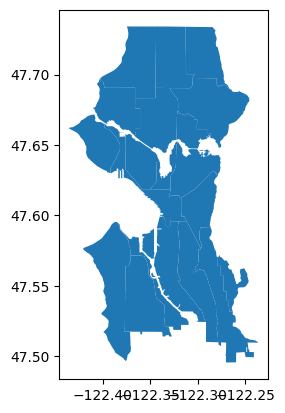

In [ ]:
# What are the different ways to plot the geometries of a GeoDataFrame?


In [ ]:
# What are the different ways to plot the geometries of a GeoDataFrame?


In [ ]:
# How do we print the first n rows of a DataFrame in Python?



OBJECTID        L_HOOD                                   S_HOOD_ALT_NAMES  \
0        28       Ballard  Loyal Heights, Adams, Whittier Heights, West W...   
1        29   Beacon Hill  North Beacon Hill, Mid-Beacon Hill, South Beac...   
2        30  Capitol Hill  Portage Bay, Montlake, Madison Park, Broadway,...   
3        31       Cascade               Westlake, Eastlake, South Lake Union   
4        32  Central Area  Madrona, Harrison/Denny-Blaine, Minor, Leschi,...   

    Shape__Area  Shape__Length  \
0  1.046035e+08   59248.568772   
1  1.479894e+08   78783.502732   
2  1.068562e+08   75147.170565   
3  2.717920e+07   48680.288698   
4  9.527258e+07   52688.475894   

                                            geometry  
0  POLYGON ((-122.40266 47.69602, -122.40236 47.6...  
1  POLYGON ((-122.31281 47.59581, -122.31216 47.5...  
2  MULTIPOLYGON (((-122.29599 47.64184, -122.2960...  
3  POLYGON ((-122.32124 47.65231, -122.32113 47.6...  
4  POLYGON ((-122.27911 47.62786, -122.27915 47.6...

### What is Geometry Column in Geospatial Data?

<div style="text-align:justify;">

Before we dive into working with GeoDataFrames, let's understand some fundamental geospatial data terms:


1. **Geographic Coordinate System (GCS):** Think of this as the starting point. It's like a map that represents Earth as a round globe. GCS measures locations using angles, typically in degrees.

2. **Projected Coordinate System (PCS):** Now, imagine taking that round Earth map and flattening it onto a 2D surface using mathematical transformations. PCS is like the result—a flat map made from the round Earth. It measures locations in linear units like meters.

</div>

![image.png](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/crs_types.png)

> **Coordinate Reference System (CRS):** This is like the overarching system that covers both GCS and PCS. CRS provides instructions on how to translate a location on Earth onto a flat 2D map or screen. The most commonly used CRS is known as 'EPSG:4326.'

So, in essence, CRS encompasses both GCS and PCS. Understanding these terms will help you work effectively with GeoDataFrames. But remember, the main difference between a DataFrame and a GeoDataFrame is the "geometry column," which holds information about the shapes and locations of objects on Earth. A GeoDataFrame may have multiple geometry columns, but you typically work with one at a time. Checking the GeoDataFrame's structure is crucial before analyzing geospatial data.

In [ ]:

# How do we get the CRS of the geometries in a GeoDataFrame in Python?



<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# How do we set a CRS of the geometries (epsg='4326' or '3857') in a GeoDataFrame in Python?


0     POLYGON ((-122.40266 47.69602, -122.40236 47.6...
1     POLYGON ((-122.31281 47.59581, -122.31216 47.5...
2     MULTIPOLYGON (((-122.29599 47.64184, -122.2960...
3     POLYGON ((-122.32124 47.65231, -122.32113 47.6...
4     POLYGON ((-122.27911 47.62786, -122.27915 47.6...
5     POLYGON ((-122.35272 47.56439, -122.35253 47.5...
6     POLYGON ((-122.32929 47.59240, -122.32969 47.5...
7     POLYGON ((-122.39728 47.66505, -122.39731 47.6...
8     POLYGON ((-122.28403 47.73358, -122.28403 47.7...
9     POLYGON ((-122.40893 47.67149, -122.40886 47.6...
10    MULTIPOLYGON (((-122.34811 47.55931, -122.3480...
11    POLYGON ((-122.31190 47.67206, -122.31191 47.6...
12    POLYGON ((-122.30670 47.69134, -122.30782 47.6...
13    POLYGON ((-122.37391 47.65711, -122.37378 47.6...
14    POLYGON ((-122.28794 47.59113, -122.28700 47.5...
15    POLYGON ((-122.27263 47.54604, -122.27264 47.5...
16    POLYGON ((-122.38713 47.59525, -122.38710 47.5...
17    POLYGON ((-122.34453 47.69056, -122.34449 47.6...
18    POLYGON ((-122.32907 47.69010, -122.32906 47.6...
19    POLYGON ((-122.30784 47.67097, -122.30661 47.6...
Name: geometry, dtype: geometry

In [ ]:
# Changing CRS from GCS (WGS84) to PCS (UTM Zone 33T). Here, EPSG:32633 corresponds to UTM Zone 33T


geometry  \
0   POLYGON ((-122.40266 47.69602, -122.40236 47.6...   
1   POLYGON ((-122.31281 47.59581, -122.31216 47.5...   
2   MULTIPOLYGON (((-122.29599 47.64184, -122.2960...   
3   POLYGON ((-122.32124 47.65231, -122.32113 47.6...   
4   POLYGON ((-122.27911 47.62786, -122.27915 47.6...   
5   POLYGON ((-122.35272 47.56439, -122.35253 47.5...   
6   POLYGON ((-122.32929 47.59240, -122.32969 47.5...   
7   POLYGON ((-122.39728 47.66505, -122.39731 47.6...   
8   POLYGON ((-122.28403 47.73358, -122.28403 47.7...   
9   POLYGON ((-122.40893 47.67149, -122.40886 47.6...   
10  MULTIPOLYGON (((-122.34811 47.55931, -122.3480...   
11  POLYGON ((-122.31190 47.67206, -122.31191 47.6...   
12  POLYGON ((-122.30670 47.69134, -122.30782 47.6...   
13  POLYGON ((-122.37391 47.65711, -122.37378 47.6...   
14  POLYGON ((-122.28794 47.59113, -122.28700 47.5...   
15  POLYGON ((-122.27263 47.54604, -122.27264 47.5...   
16  POLYGON ((-122.38713 47.59525, -122.38710 47.5...   
17  POLYGON ((-122.34453 47.69056, -122.34449 47.6...   
18  POLYGON ((-122.32907 47.69010, -122.32906 47.6...   
19  POLYGON ((-122.30784 47.67097, -122.30661 47.6...   

                                         geometry_pcs  
0   POLYGON ((-2640676.779 13767090.744, -2640749....  
1   POLYGON ((-2653992.592 13773166.771, -2654037....  
2   MULTIPOLYGON (((-2651925.285 13767614.310, -26...  
3   POLYGON ((-2649426.719 13767735.147, -2649436....  
4   POLYGON ((-2654087.930 13768253.377, -2654086....  
5   POLYGON ((-2653413.690 13778313.029, -2653464....  
6   POLYGON ((-2653081.123 13774304.540, -2653053....  
7   POLYGON ((-2643227.316 13770032.404, -2643228....  
8   POLYGON ((-2646292.399 13757580.158, -2646298....  
9   POLYGON ((-2641962.204 13769919.622, -2641968....  
10  MULTIPOLYGON (((-2654092.951 13778618.782, -26...  
11  POLYGON ((-2648687.059 13765252.778, -2648683....  
12  POLYGON ((-2647691.625 13763015.592, -2647668....  
13  POLYGON ((-2645415.025 13769742.823, -2645424....  
14  POLYGON ((-2656059.617 13772466.010, -2656127....  
15  POLYGON ((-2660305.752 13776392.802, -2660247....  
16  POLYGON ((-2648838.947 13776759.873, -2648842....  
17  POLYGON ((-2645111.124 13764894.055, -2645624....  
18  POLYGON ((-2646220.155 13764207.118, -2646224....  
19  POLYGON ((-2649046.488 13765171.464, -2649148....

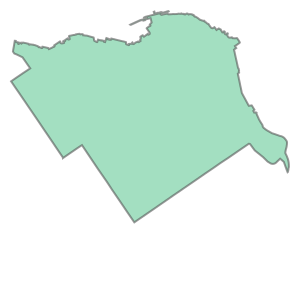

## Exercise 1: Read and Write Subset
Prompt: Read the Neighborhood Map Atlas Districts dataset, select districts in a specific part of Atlanta such as Downtown, and write this subset to a new GeoJSON file.

In [ ]:
import geopandas as gpd


OBJECTID    L_HOOD                                   S_HOOD_ALT_NAMES  \
6        34  Downtown  Pike-Market, Belltown, International District,...   

    Shape__Area  Shape__Length  \
6  5.537664e+07   51622.719582   

                                            geometry  
6  POLYGON ((-122.32929 47.59240, -122.32969 47.5...

## 3. Accessing and Selecting GeoData


Besides the common methods for accessing data in Pandas, there are two additional tailored methods for geospatial data in GeoPandas, namely slicing by cx and filtering by contains() and within().
- Slicing
          1. loc(): label based indexing
          2. iloc(): integer position based indexing
          3. cx(): bounding box indexing
- Boolean Masking
          1. within(): checks if a point is within a polygon
          2. contains(): checks if a polygon contains a point

In [ ]:
# Read the public school dataset
#'https://raw.githubusercontent.com/aaubs/ds-master/main/data/Public_Schools.geojson'



<Axes: >

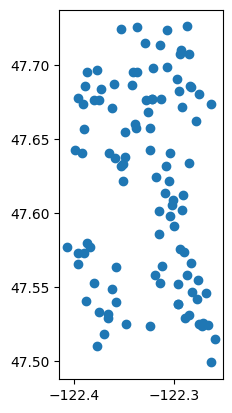

In [ ]:
# Plot the public school dataset


In [ ]:
# Plot teh public school dataset uisng explore


In [ ]:
# How do we slice a column in a GeoDataFrame by coordinates?
# slicing cx
# gdf_ps.cx[-122.37:-122.39, 47.63:47.6835].explore()



OBJECTID               TYPE               SCHOOL           ADDRESS  \
5           6         Elementary     CATHARINE BLAINE   2550 34th Ave W   
12         14         Elementary          LAWTON ELEM   4000 27th Ave W   
18         20  Option Elementary          MONROE BLDG   1810 NW 65th St   
23         26         Elementary             COE ELEM    2424 7th Ave W   
27         30         Elementary           ADAMS ELEM  6110 28th Ave NW   
57         64        High School  BALLARD HIGH SCHOOL   1418 NW 65th St   
77         84         Elementary             MAGNOLIA   2418 28th Ave W   
82         89         Elementary   WEST WOODLAND ELEM   5601 4th Ave NW   
101       113  Option Elementary              WEBSTER   3015 NW 68th St   

    SE_ANNO_CAD_DATA                  NAME GRADE     CITY    ZIP  \
5               None  Catharine Blaine K-8   K-8  Seattle  98199   
12              None                Lawton   K-5  Seattle  98199   
18              None        Salmon Bay K-8   K-8  Seattle  98117   
23              None                   Coe   K-5  Seattle  98119   
27              None                 Adams   K-5  Seattle  98107   
57              None               Ballard  9-12  Seattle  98117   
77              None              Magnolia   K-5  Seattle  98199   
82              None         West Woodland   K-5  Seattle  98107   
101             None    Licton Springs K-8   K-8  Seattle  98117   

             PHONE                                      WEBSITE        XCOORD  \
5    (206)252-1920          http://blainek8.seattleschools.org/  1.254418e+06   
12   (206)252-2130          http://lawtones.seattleschools.org/  1.256690e+06   
18   (206)252-1720       http://salmonbayk8.seattleschools.org/  1.259289e+06   
23   (206)252-2000             http://coees.seattleschools.org/  1.262702e+06   
27   (206)252-1300           http://adamses.seattleschools.org/  1.256558e+06   
57   (206)252-1000         http://ballardhs.seattleschools.org/  1.260676e+06   
77   (206)743-3800       https://magnoliaes.seattleschools.org/  1.256042e+06   
82   (206)252-1600    http://westwoodlandes.seattleschools.org/  1.263746e+06   
101  (206)743-3700  https://lictonspringsk8.seattleschools.org/  1.255396e+06   

            YCOORD SITE_USE PRJ_ENRLLMNT                     geometry  
5    238203.119848   Active         None  POINT (-122.39926 47.64226)  
12   243430.789839   Active         None  POINT (-122.39047 47.65671)  
18   250523.770075   Active         None  POINT (-122.38051 47.67630)  
23   237401.020074   Active         None  POINT (-122.36560 47.64052)  
27   249606.479915   Active         None  POINT (-122.39152 47.67363)  
57   250610.249889   Active         None  POINT (-122.37489 47.67661)  
77   237567.699859   Active         None  POINT (-122.39262 47.64061)  
82   248355.779989   Active         None  POINT (-122.36225 47.67060)  
101  251113.832215   Active         None  POINT (-122.39631 47.67767)

Here we create a new column called Group in the gdf_ps and assigns the value 1 to the rows that intersect the specified coordinates and the value 0 to the rows that do not intersect the specified coordinates.


Index(['OBJECTID', 'TYPE', 'SCHOOL', 'ADDRESS', 'SE_ANNO_CAD_DATA', 'NAME',
       'GRADE', 'CITY', 'ZIP', 'PHONE', 'WEBSITE', 'XCOORD', 'YCOORD',
       'SITE_USE', 'PRJ_ENRLLMNT', 'geometry'],
      dtype='object')

In [ ]:
# # How to categorize data points based on whether they intersect with the specific area,
# # labeling those within the area as '1' and those outside as '0'?



In [ ]:
gdf_ps.columns

Index(['OBJECTID', 'TYPE', 'SCHOOL', 'ADDRESS', 'SE_ANNO_CAD_DATA', 'NAME',
       'GRADE', 'CITY', 'ZIP', 'PHONE', 'WEBSITE', 'XCOORD', 'YCOORD',
       'SITE_USE', 'PRJ_ENRLLMNT', 'geometry', 'Group'],
      dtype='object')

31

(31, 17)

(74, 17)

OBJECTID                TYPE                   SCHOOL  \
0           1          Elementary         BEACON HILL ELEM   
1           2          Elementary             CONCORD ELEM   
2           3         High School  NATHAN HALE HIGH SCHOOL   
3           4          Elementary       OLYMPIC HILLS ELEM   
4           5       Middle School               AKI KUROSE   
..        ...                 ...                      ...   
97        107         High School     FRANKLIN HIGH SCHOOL   
98        108          Elementary           NORTHGATE ELEM   
100       112          Elementary          VAN ASSELT ELEM   
102       114  Option High School    CLEVELAND HIGH SCHOOL   
104       117         High School     INGRAHAM HIGH SCHOOL   

                  ADDRESS SE_ANNO_CAD_DATA               NAME GRADE     CITY  \
0        2025 14th Ave. S             None  Beacon Hill Int'l   K-5  Seattle   
1       723 S Concord St.             None      Concord Int'l   K-5  Seattle   
2       10750 30th Ave NE             None        Nathan Hale  9-12  Seattle   
3       13018 20th Ave NE             None      Olympic Hills   K-5  Seattle   
4        3928 S Graham St             None         Aki Kurose   6-8  Seattle   
..                    ...              ...                ...   ...      ...   
97   3013 S Mt Baker Blvd             None           Franklin  9-12  Seattle   
98       11725 1st Ave NE             None          Northgate   K-5  Seattle   
100     7201 Beacon Ave S             None  Kimball - Interim   K-5  Seattle   
102       5511 15th Ave S             None          Cleveland  9-12  Seattle   
104       1819 N 135th St             None           Ingraham  9-12  Seattle   

       ZIP           PHONE                                    WEBSITE  \
0    98144  (206) 252-2700    http://beaconhilles.seattleschools.org/   
1    98108  (206) 252-8100       http://concordes.seattleschools.org/   
2    98125   (206)252-3680          http://halehs.seattleschools.org/   
3    98125   (206)413-2200  http://olympichillses.seattleschools.org/   
4    98118   (206)252-7700        http://kurosems.seattleschools.org/   
..     ...             ...                                        ...   
97   98144   (206)252-6150      http://franklinhs.seattleschools.org/   
98   98125   (206)252-4180     http://northgatees.seattleschools.org/   
100  98108   (206)252-7280      https://kimballes.seattleschools.org/   
102  98108   (206)252-7800     http://clevelandhs.seattleschools.org/   
104  98133   (206)252-3880      http://ingrahamhs.seattleschools.org/   

           XCOORD         YCOORD SITE_USE PRJ_ENRLLMNT  \
0    1.274761e+06  217081.839912   Active         None   
1    1.271958e+06  194568.029953   Active         None   
2    1.280683e+06  261536.279874   Active         None   
3    1.277786e+06  267449.850068   Active         None   
4    1.282665e+06  202649.160116   Active         None   
..            ...            ...      ...          ...   
97   1.279989e+06  213486.240148   Active         None   
98   1.272106e+06  264341.990142   Active         None   
100  1.279168e+06  199712.390071  Interim         None   
102  1.274823e+06  205005.729878   Active         None   
104  1.270398e+06  268327.269901   Active         None   

                        geometry  Group  
0    POINT (-122.31510 47.58547)      0  
1    POINT (-122.32469 47.52361)      0  
2    POINT (-122.29453 47.70763)      0  
3    POINT (-122.30676 47.72369)      0  
4    POINT (-122.28198 47.54632)      0  
..                           ...    ...  
97   POINT (-122.29365 47.57589)      0  
98   POINT (-122.32959 47.71487)      0  
100  POINT (-122.29591 47.53809)      0  
102  POINT (-122.31391 47.55237)      0  
104  POINT (-122.33684 47.72570)      0  

[74 rows x 17 columns]

In [ ]:
# How many schools are within the specific area and how many are outside the specific area?
# Count the number of schools within and outside the specific area.


Group
0    74
1    31
Name: count, dtype: int64

In [ ]:
# How to select a specific part of the data using iloc and loc?



OBJECTID           TYPE                   SCHOOL            ADDRESS  \
0         1     Elementary         BEACON HILL ELEM   2025 14th Ave. S   
1         2     Elementary             CONCORD ELEM  723 S Concord St.   
2         3    High School  NATHAN HALE HIGH SCHOOL  10750 30th Ave NE   
3         4     Elementary       OLYMPIC HILLS ELEM  13018 20th Ave NE   
4         5  Middle School               AKI KUROSE   3928 S Graham St   
5         6     Elementary         CATHARINE BLAINE    2550 34th Ave W   
6         7     Elementary       DEARBORN PARK ELEM    2820 S Orcas St   
7         8     Elementary        DECATUR BLDG/DS-2   7711 43rd Ave NE   
8         9     Elementary             SANISLO ELEM  1812 SW Myrtle St   
9        10     Elementary            WHITTIER ELEM    1320 NW 75th St   

  SE_ANNO_CAD_DATA                  NAME GRADE     CITY    ZIP  \
0             None     Beacon Hill Int'l   K-5  Seattle  98144   
1             None         Concord Int'l   K-5  Seattle  98108   
2             None           Nathan Hale  9-12  Seattle  98125   
3             None         Olympic Hills   K-5  Seattle  98125   
4             None            Aki Kurose   6-8  Seattle  98118   
5             None  Catharine Blaine K-8   K-8  Seattle  98199   
6             None   Dearborn Park Int'l   K-5  Seattle  98108   
7             None               Decatur   1-5  Seattle  98115   
8             None               Sanislo   K-5  Seattle  98106   
9             None              Whittier   K-5  Seattle  98117   

            PHONE                                    WEBSITE        XCOORD  \
0  (206) 252-2700    http://beaconhilles.seattleschools.org/  1.274761e+06   
1  (206) 252-8100       http://concordes.seattleschools.org/  1.271958e+06   
2   (206)252-3680          http://halehs.seattleschools.org/  1.280683e+06   
3   (206)413-2200  http://olympichillses.seattleschools.org/  1.277786e+06   
4   (206)252-7700        http://kurosems.seattleschools.org/  1.282665e+06   
5   (206)252-1920        http://blainek8.seattleschools.org/  1.254418e+06   
6   (206)252-6930      http://dearbornes.seattleschools.org/  1.279174e+06   
7   (206)252-3230      https://decatures.seattleschools.org/  1.283450e+06   
8   (206)252-8380       http://sanisloes.seattleschools.org/  1.263683e+06   
9   (206)252-1650      http://whittieres.seattleschools.org/  1.261173e+06   

          YCOORD SITE_USE PRJ_ENRLLMNT                     geometry  Group  
0  217081.839912   Active         None  POINT (-122.31510 47.58547)      0  
1  194568.029953   Active         None  POINT (-122.32469 47.52361)      0  
2  261536.279874   Active         None  POINT (-122.29453 47.70763)      0  
3  267449.850068   Active         None  POINT (-122.30676 47.72369)      0  
4  202649.160116   Active         None  POINT (-122.28198 47.54632)      0  
5  238203.119848   Active         None  POINT (-122.39926 47.64226)      1  
6  204882.489967   Active         None  POINT (-122.29629 47.55226)      0  
7  253237.617010   Active         None  POINT (-122.28266 47.68503)      0  
8  200566.689871   Active         None  POINT (-122.35866 47.53961)      0  
9  253146.520079   Active         None  POINT (-122.37308 47.68359)      0

This is super simple and useful. From here, I can explore how many schools there are in a neighborhood for example. Here’s how I do that:

Index(['OBJECTID', 'TYPE', 'SCHOOL', 'ADDRESS', 'SE_ANNO_CAD_DATA', 'NAME',
       'GRADE', 'CITY', 'ZIP', 'PHONE', 'WEBSITE', 'XCOORD', 'YCOORD',
       'SITE_USE', 'PRJ_ENRLLMNT', 'geometry', 'Group'],
      dtype='object')

Index(['OBJECTID', 'L_HOOD', 'S_HOOD_ALT_NAMES', 'Shape__Area',
       'Shape__Length', 'geometry', 'geometry_pcs'],
      dtype='object')

In [ ]:
# How to filter all schools that are within polygon 0?
# Boolean Masking using within()



(7, 17)

In [ ]:
# How to filter all schools that are outside polygon 0?



(98, 17)

## Exercise 2: Select by Condition
Prompt: From the Public Schools dataset, select and print all schools that are classified as High Schools.

Index(['OBJECTID', 'TYPE', 'SCHOOL', 'ADDRESS', 'SE_ANNO_CAD_DATA', 'NAME',
       'GRADE', 'CITY', 'ZIP', 'PHONE', 'WEBSITE', 'XCOORD', 'YCOORD',
       'SITE_USE', 'PRJ_ENRLLMNT', 'geometry', 'Group'],
      dtype='object')

OBJECTID         TYPE                     SCHOOL                 ADDRESS  \
2          3  High School    NATHAN HALE HIGH SCHOOL       10750 30th Ave NE   
22        25  High School      ROOSEVELT HIGH SCHOOL         1410 NE 66th St   
26        29  High School   WEST SEATTLE HIGH SCHOOL  3000 California Ave SW   
40        44  High School                    LINCOLN    4400 Interlake Ave N   
49        55  High School  RAINIER BEACH HIGH SCHOOL  8815 Seward Park Ave S   

   SE_ANNO_CAD_DATA               NAME GRADE     CITY    ZIP          PHONE  \
2              None        Nathan Hale  9-12  Seattle  98125  (206)252-3680   
22             None          Roosevelt  9-12  Seattle  98115  (206)252-4810   
26             None  West Seattle High  9-12  Seattle  98116  (206)252-8800   
40             None            Lincoln  9-12  Seattle  98103  (206)413-2500   
49             None      Rainier Beach  9-12  Seattle  98118  (206)252-6350   

                                     WEBSITE        XCOORD         YCOORD  \
2          http://halehs.seattleschools.org/  1.280683e+06  261536.279874   
22    http://roosevelths.seattleschools.org/  1.275971e+06  250536.430155   
26  http://westseattlehs.seattleschools.org/  1.257552e+06  214250.750102   
40     https://lincolnhs.seattleschools.org/  1.269243e+06  244366.399844   
49  http://rainierbeachhs.seattleschools.org  1.286495e+06  194459.620065   

   SITE_USE PRJ_ENRLLMNT                     geometry  Group  
2    Active         None  POINT (-122.29453 47.70763)      0  
22   Active         None  POINT (-122.31281 47.67723)      1  
26   Active         None  POINT (-122.38459 47.57678)      0  
40   Active         None  POINT (-122.33962 47.65996)      1  
49   Active         None  POINT (-122.26586 47.52407)      0

##4. Merging Data


Often you'll need to combine spatial data from different sources. GeoPandas provides methods to perform different types of merges, similar to how Pandas handles merging.

Merging GeoDataFrames based on geometry—often referred to as "spatial join"—allows you to combine two GeoDataFrames based on their spatial relationship to one another. This is different from attribute-based joining, where the merge happens based on common columns.

The sjoin function from GeoPandas provides this functionality. The op parameter specifies the type of spatial join to be performed:

- 'within': The first (left) GeoDataFrame’s geometries are within the second (right) GeoDataFrame’s geometries.
- 'contains': The first (left) GeoDataFrame’s geometries contain the geometries of the second (right) GeoDataFrame.
- 'intersects': The geometries of the two GeoDataFrames intersect with each other.


In [ ]:
# How to merge two geospatial datasets?



/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


Index(['OBJECTID_left', 'TYPE', 'SCHOOL', 'ADDRESS', 'SE_ANNO_CAD_DATA',
       'NAME', 'GRADE', 'CITY', 'ZIP', 'PHONE', 'WEBSITE', 'XCOORD', 'YCOORD',
       'SITE_USE', 'PRJ_ENRLLMNT', 'geometry', 'Group', 'index_right',
       'OBJECTID_right', 'L_HOOD', 'S_HOOD_ALT_NAMES', 'Shape__Area',
       'Shape__Length', 'geometry_pcs'],
      dtype='object')

> The possible values for "how=" argument are:
> - inner: Only features that are present in both input geometries are included in the output.
- left: All features from the left input geometry are included in the output, along with any features from the right input geometry that intersect with them.
- right: All features from the right input geometry are included in the output, along with any features from the left input geometry that intersect with them.
- full: All features from both input geometries are included in the output, even if they do not intersect.

> The op argument defines the spatial relationship that must be satisfied for two geometries to be considered joined. The possible values for "op=" argument are:
> - within: The left geometry must be within the right geometry.
- contains: The right geometry must contain the left geometry.
- intersects: The two geometries must intersect.



In [ ]:
# How many schools are in each neighborhood in the joined_gdf GeoDataFrame?



L_HOOD
Rainier Valley      13
Beacon Hill          9
North Central        9
West Seattle         9
Northeast            9
Central Area         8
Delridge             8
Northgate            7
Ballard              7
Queen Anne           6
Lake City            5
Capitol Hill         5
Northwest            4
Magnolia             3
Greater Duwamish     1
Seward Park          1
Cascade              1
Name: count, dtype: int64

## Exercise 3: Merge on Districts
Prompt: Merge the Public Schools for high school dataset with the Neighborhood Map Atlas Districts on matching district names.

Index(['OBJECTID', 'TYPE', 'SCHOOL', 'ADDRESS', 'SE_ANNO_CAD_DATA', 'NAME',
       'GRADE', 'CITY', 'ZIP', 'PHONE', 'WEBSITE', 'XCOORD', 'YCOORD',
       'SITE_USE', 'PRJ_ENRLLMNT', 'geometry', 'Group'],
      dtype='object')

OBJECTID         TYPE                     SCHOOL                 ADDRESS  \
2           3  High School    NATHAN HALE HIGH SCHOOL       10750 30th Ave NE   
22         25  High School      ROOSEVELT HIGH SCHOOL         1410 NE 66th St   
26         29  High School   WEST SEATTLE HIGH SCHOOL  3000 California Ave SW   
40         44  High School                    LINCOLN    4400 Interlake Ave N   
49         55  High School  RAINIER BEACH HIGH SCHOOL  8815 Seward Park Ave S   
57         64  High School        BALLARD HIGH SCHOOL         1418 NW 65th St   
69         76  High School         SEALTH HIGH SCHOOL      2600 SW Thistle St   
95        105  High School       GARFIELD HIGH SCHOOL            400 23rd Ave   
97        107  High School       FRANKLIN HIGH SCHOOL    3013 S Mt Baker Blvd   
104       117  High School       INGRAHAM HIGH SCHOOL         1819 N 135th St   

    SE_ANNO_CAD_DATA                NAME GRADE     CITY    ZIP          PHONE  \
2               None         Nathan Hale  9-12  Seattle  98125  (206)252-3680   
22              None           Roosevelt  9-12  Seattle  98115  (206)252-4810   
26              None   West Seattle High  9-12  Seattle  98116  (206)252-8800   
40              None             Lincoln  9-12  Seattle  98103  (206)413-2500   
49              None       Rainier Beach  9-12  Seattle  98118  (206)252-6350   
57              None             Ballard  9-12  Seattle  98117  (206)252-1000   
69              None  Chief Sealth Int'l  9-12  Seattle  98126  (206)252-8550   
95              None            Garfield  9-12  Seattle  98122  (206)252-2270   
97              None            Franklin  9-12  Seattle  98144  (206)252-6150   
104             None            Ingraham  9-12  Seattle  98133  (206)252-3880   

                                      WEBSITE        XCOORD         YCOORD  \
2           http://halehs.seattleschools.org/  1.280683e+06  261536.279874   
22     http://roosevelths.seattleschools.org/  1.275971e+06  250536.430155   
26   http://westseattlehs.seattleschools.org/  1.257552e+06  214250.750102   
40      https://lincolnhs.seattleschools.org/  1.269243e+06  244366.399844   
49   http://rainierbeachhs.seattleschools.org  1.286495e+06  194459.620065   
57       http://ballardhs.seattleschools.org/  1.260676e+06  250610.249889   
69   http://chiefsealthhs.seattleschools.org/  1.261752e+06  196600.490127   
95      http://garfieldhs.seattleschools.org/  1.278157e+06  224295.250026   
97      http://franklinhs.seattleschools.org/  1.279989e+06  213486.240148   
104     http://ingrahamhs.seattleschools.org/  1.270398e+06  268327.269901   

    SITE_USE PRJ_ENRLLMNT                     geometry  Group  
2     Active         None  POINT (-122.29453 47.70763)      0  
22    Active         None  POINT (-122.31281 47.67723)      1  
26    Active         None  POINT (-122.38459 47.57678)      0  
40    Active         None  POINT (-122.33962 47.65996)      1  
49    Active         None  POINT (-122.26586 47.52407)      0  
57    Active         None  POINT (-122.37489 47.67661)      1  
69    Active         None  POINT (-122.36615 47.52863)      0  
95    Active         None  POINT (-122.30190 47.60542)      0  
97    Active         None  POINT (-122.29365 47.57589)      0  
104   Active         None  POINT (-122.33684 47.72570)      0

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


OBJECTID_left         TYPE                     SCHOOL  \
2               3  High School    NATHAN HALE HIGH SCHOOL   
22             25  High School      ROOSEVELT HIGH SCHOOL   
26             29  High School   WEST SEATTLE HIGH SCHOOL   
40             44  High School                    LINCOLN   
49             55  High School  RAINIER BEACH HIGH SCHOOL   

                   ADDRESS SE_ANNO_CAD_DATA               NAME GRADE     CITY  \
2        10750 30th Ave NE             None        Nathan Hale  9-12  Seattle   
22         1410 NE 66th St             None          Roosevelt  9-12  Seattle   
26  3000 California Ave SW             None  West Seattle High  9-12  Seattle   
40    4400 Interlake Ave N             None            Lincoln  9-12  Seattle   
49  8815 Seward Park Ave S             None      Rainier Beach  9-12  Seattle   

      ZIP          PHONE  ... SITE_USE  PRJ_ENRLLMNT  \
2   98125  (206)252-3680  ...   Active          None   
22  98115  (206)252-4810  ...   Active          None   
26  98116  (206)252-8800  ...   Active          None   
40  98103  (206)413-2500  ...   Active          None   
49  98118  (206)252-6350  ...   Active          None   

                       geometry Group index_right OBJECTID_right  \
2   POINT (-122.29453 47.70763)     0           8             36   
22  POINT (-122.31281 47.67723)     1          11             41   
26  POINT (-122.38459 47.57678)     0          16             47   
40  POINT (-122.33962 47.65996)     1          18             50   
49  POINT (-122.26586 47.52407)     0          14             44   

            L_HOOD                                   S_HOOD_ALT_NAMES  \
2        Lake City  Victory Heights, Matthews Beach, Meadowbrook, ...   
22       Northeast  View Ridge, Ravenna, Sand Point, Bryant, Winde...   
26    West Seattle  Seaview, Gatewood, Arbor Heights, Alki, North ...   
40   North Central  Phinney Ridge, Wallingford, Fremont, Green Lak...   
49  Rainier Valley  Brighton, Dunlap, Rainier Beach, Mount Baker, ...   

     Shape__Area  Shape__Length  
2   1.158068e+08   54114.407337  
22  1.906384e+08   70194.053708  
26  2.118477e+08   88702.085501  
40  1.380115e+08   55809.739485  
49  1.557389e+08  111295.863990  

[5 rows x 23 columns]

OBJECTID_x         TYPE                     SCHOOL                 ADDRESS  \
0           3  High School    NATHAN HALE HIGH SCHOOL       10750 30th Ave NE   
1          25  High School      ROOSEVELT HIGH SCHOOL         1410 NE 66th St   
2          29  High School   WEST SEATTLE HIGH SCHOOL  3000 California Ave SW   
3          44  High School                    LINCOLN    4400 Interlake Ave N   
4          55  High School  RAINIER BEACH HIGH SCHOOL  8815 Seward Park Ave S   

  SE_ANNO_CAD_DATA               NAME GRADE     CITY    ZIP          PHONE  \
0             None        Nathan Hale  9-12  Seattle  98125  (206)252-3680   
1             None          Roosevelt  9-12  Seattle  98115  (206)252-4810   
2             None  West Seattle High  9-12  Seattle  98116  (206)252-8800   
3             None            Lincoln  9-12  Seattle  98103  (206)413-2500   
4             None      Rainier Beach  9-12  Seattle  98118  (206)252-6350   

   ...         YCOORD  SITE_USE  PRJ_ENRLLMNT                     geometry  \
0  ...  261536.279874    Active          None  POINT (-122.29453 47.70763)   
1  ...  250536.430155    Active          None  POINT (-122.31281 47.67723)   
2  ...  214250.750102    Active          None  POINT (-122.38459 47.57678)   
3  ...  244366.399844    Active          None  POINT (-122.33962 47.65996)   
4  ...  194459.620065    Active          None  POINT (-122.26586 47.52407)   

  Group OBJECTID_y  L_HOOD  S_HOOD_ALT_NAMES Shape__Area Shape__Length  
0     0        NaN     NaN               NaN         NaN           NaN  
1     1        NaN     NaN               NaN         NaN           NaN  
2     0        NaN     NaN               NaN         NaN           NaN  
3     1        NaN     NaN               NaN         NaN           NaN  
4     0        NaN     NaN               NaN         NaN           NaN  

[5 rows x 22 columns]

## Exercise 4: Count the Number of Different Types of Schools in Each District
Prompt: Using the Public Schools dataset and the Neighborhood Map Atlas Districts dataset, perform a spatial join to count how many elementary, middle, and high schools are in each district. Display the results in a table showing each district along with the counts of each type of school.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


TYPE                                        \
TYPE             Elementary High School Middle School NonStandard   
L_HOOD                                                              
Ballard                   4           1             0           0   
Beacon Hill               6           0             1           0   
Capitol Hill              4           0             1           0   
Cascade                   0           0             0           0   
Central Area              4           1             1           0   
Delridge                  3           1             1           0   
Greater Duwamish          1           0             0           0   
Lake City                 2           1             1           0   
Magnolia                  3           0             0           0   
North Central             4           1             1           0   
Northeast                 6           1             1           0   
Northgate                 3           1             1           0   
Northwest                 3           0             1           0   
Queen Anne                2           0             1           1   
Rainier Valley            6           2             1           0   
Seward Park               1           0             0           0   
West Seattle              7           1             1           0   

                                                                      
TYPE             Option Elementary Option High School Service School  
L_HOOD                                                                
Ballard                          2                  0              0  
Beacon Hill                      0                  1              1  
Capitol Hill                     0                  0              0  
Cascade                          1                  0              0  
Central Area                     0                  0              2  
Delridge                         2                  0              1  
Greater Duwamish                 0                  0              0  
Lake City                        1                  0              0  
Magnolia                         0                  0              0  
North Central                    2                  0              1  
Northeast                        1                  0              0  
Northgate                        2                  0              0  
Northwest                        0                  0              0  
Queen Anne                       1                  1              0  
Rainier Valley                   2                  1              1  
Seward Park                      0                  0              0  
West Seattle                     0                  0              0

## Exercise 5: Districts Containing No Schools
Prompt:

Identify and list all districts that do not contain any schools.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


array(['Downtown', 'Interbay', 'University District'], dtype=object)

## 5. Geometric Manipulations

Geometric manipulations are often essential when working with geospatial data. GeoPandas offers various methods and attributes for these tasks, including centroid, boundary, area, and distance. Understanding these methods can provide deeper insights into your spatial data.


           1. centroid: For printing the center points of the polygons. It is based on Point object of GeoPandas.
           2. boundary: For printing the boundaries of the polygons. it is based on line object of GeoPandas.
           3. area: For printing polygon and multipolygon areas. It is based on Polygon object of GeoPandas.
           4. distance(): Distance between two points can be calculated using this method.
[Here](https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html) you will find more geometric operations.

![image.png](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/point_line_polygon.jpg)

### 5.1. Centroid

The **centroid** attribute calculates the central point of each geometry in the GeoDataFrame.

In [ ]:
# How to calculate the centroid of each polygon?
# Calculating and storing centroids



<ipython-input-51-a30cd1fef4f8>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid


0     POINT (-122.38349 47.67671)
1     POINT (-122.30156 47.55426)
2     POINT (-122.30605 47.63175)
3     POINT (-122.33368 47.63017)
4     POINT (-122.29738 47.60695)
5     POINT (-122.35811 47.53966)
6     POINT (-122.33269 47.60765)
7     POINT (-122.38107 47.64173)
8     POINT (-122.29403 47.71425)
9     POINT (-122.40469 47.65176)
10    POINT (-122.33237 47.55966)
11    POINT (-122.28553 47.67769)
12    POINT (-122.32775 47.71150)
13    POINT (-122.35996 47.63728)
14    POINT (-122.27533 47.53951)
15    POINT (-122.26446 47.55322)
16    POINT (-122.38823 47.55088)
17    POINT (-122.36455 47.70735)
18    POINT (-122.34183 47.66816)
19    POINT (-122.30835 47.65979)
dtype: geometry

In [ ]:
# Calculating and storing centroids



<ipython-input-52-809f445f0aed>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid


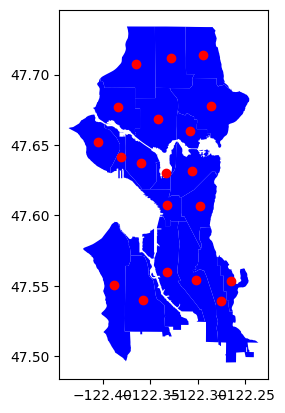

In [ ]:
# How to plot neighborhoods alnog with the centroid points of each one?



### 5.2. Boundary

The boundary attribute extracts the outer boundaries of the geometries.



In [ ]:
# Calculate and store the boundaries for each item in the GeoDataFrame



<Axes: >

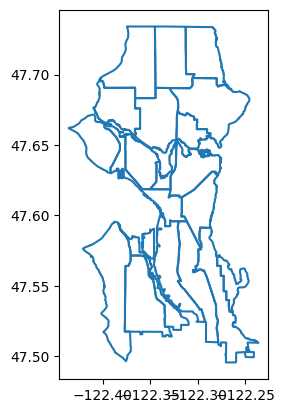

In [ ]:
# Plot boundary lines



## Exercise 6: Find Schools Within 200 Meters of District Boundaries
Prompt:

Identify schools that are located within 200 meters of any district boundary. This involves buffering the district boundaries and performing a spatial join.

OBJECTID               L_HOOD  \
0         28              Ballard   
1         29          Beacon Hill   
2         30         Capitol Hill   
3         31              Cascade   
4         32         Central Area   
5         33             Delridge   
6         34             Downtown   
7         35             Interbay   
8         36            Lake City   
9         37             Magnolia   
10        38     Greater Duwamish   
11        41            Northeast   
12        42            Northgate   
13        43           Queen Anne   
14        44       Rainier Valley   
15        45          Seward Park   
16        47         West Seattle   
17        49            Northwest   
18        50        North Central   
19        64  University District   

                                     S_HOOD_ALT_NAMES   Shape__Area  \
0   Loyal Heights, Adams, Whittier Heights, West W...  1.046035e+08   
1   North Beacon Hill, Mid-Beacon Hill, South Beac...  1.479894e+08   
2   Portage Bay, Montlake, Madison Park, Broadway,...  1.068562e+08   
3                Westlake, Eastlake, South Lake Union  2.717920e+07   
4   Madrona, Harrison/Denny-Blaine, Minor, Leschi,...  9.527258e+07   
5   Highland Park, North Delridge, Riverview, High...  1.623506e+08   
6   Pike-Market, Belltown, International District,...  5.537664e+07   
7                                            Interbay  3.350394e+07   
8   Victory Heights, Matthews Beach, Meadowbrook, ...  1.158068e+08   
9   Lawton Park, Briarcliff, Southeast Magnolia, C...  1.001117e+08   
10  Industrial District, Georgetown, South Park, H...  2.105979e+08   
11  View Ridge, Ravenna, Sand Point, Bryant, Winde...  1.906384e+08   
12  Haller Lake, Pinehurst, North College Park, Ma...  1.327271e+08   
13  East Queen Anne, West Queen Anne, Lower Queen ...  8.444960e+07   
14  Brighton, Dunlap, Rainier Beach, Mount Baker, ...  1.557389e+08   
15                Seward Park, Lakewood, Hillman City  4.383528e+07   
16  Seaview, Gatewood, Arbor Heights, Alki, North ...  2.118477e+08   
17  Broadview, Bitter Lake, North Beach/Blue Ridge...  1.647747e+08   
18  Phinney Ridge, Wallingford, Fremont, Green Lak...  1.380115e+08   
19  University District, Cowen Park, University He...  4.958568e+07   

    Shape__Length                                           geometry  
0    59248.568772  POLYGON ((-2129787.743 5922216.228, -2129808.0...  
1    78783.502732  POLYGON ((-2128916.825 5908100.546, -2128869.9...  
2    75147.170565  MULTIPOLYGON (((-2125125.312 5912385.705, -212...  
3    48680.288698  POLYGON ((-2126363.200 5914460.412, -2126357.5...  
4    52688.475894  POLYGON ((-2124687.474 5910252.678, -2124690.9...  
5    62979.283952  POLYGON ((-2133564.847 5906251.760, -2133581.6...  
6    51622.719582  POLYGON ((-2130300.819 5908359.589, -2130329.8...  
7    64207.586761  POLYGON ((-2131139.010 5918703.474, -2131144.5...  
8    54114.407337  POLYGON ((-2119126.678 5921739.948, -2119132.1...  
9    45030.220664  POLYGON ((-2131617.744 5919834.123, -2131613.9...  
10  200631.933760  MULTIPOLYGON (((-2133516.019 5905533.805, -213...  
11   70194.053708  POLYGON ((-2124582.848 5916218.201, -2124580.2...  
12   51366.992483  POLYGON ((-2123127.193 5918082.226, -2123251.4...  
13   43119.636134  POLYGON ((-2129897.761 5916968.935, -2129888.3...  
14  111295.863990  POLYGON ((-2127379.857 5906658.434, -2127313.3...  
15   52212.786810  POLYGON ((-2128791.804 5901256.350, -2128746.8...  
16   88702.085501  POLYGON ((-2134323.956 5910857.804, -2134323.2...  
17   61677.590669  POLYGON ((-2125900.214 5919430.371, -2126304.3...  
18   55809.739485  POLYGON ((-2124810.973 5918796.301, -2124812.5...  
19   41624.116649  POLYGON ((-2124350.362 5915948.691, -2124273.7...

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


geometry  index_right  \
0   POLYGON ((-2131640.621 5919958.274, -2131641.1...           13   
0   POLYGON ((-2131640.621 5919958.274, -2131641.1...            7   
0   POLYGON ((-2131640.621 5919958.274, -2131641.1...            9   
0   POLYGON ((-2131640.621 5919958.274, -2131641.1...            0   
0   POLYGON ((-2131640.621 5919958.274, -2131641.1...           18   
..                                                ...          ...   
19  POLYGON ((-2124842.138 5913091.635, -2124843.6...            2   
19  POLYGON ((-2124842.138 5913091.635, -2124843.6...            3   
19  POLYGON ((-2124842.138 5913091.635, -2124843.6...           19   
19  POLYGON ((-2124842.138 5913091.635, -2124843.6...           11   
19  POLYGON ((-2124842.138 5913091.635, -2124843.6...           18   

                 L_HOOD  
0            Queen Anne  
0              Interbay  
0              Magnolia  
0               Ballard  
0         North Central  
..                  ...  
19         Capitol Hill  
19              Cascade  
19  University District  
19            Northeast  
19        North Central  

[96 rows x 3 columns]

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


SCHOOL        L_HOOD
12   LAWTON ELEM      Downtown
12   LAWTON ELEM    Queen Anne
12   LAWTON ELEM      Interbay
12   LAWTON ELEM      Magnolia
12   LAWTON ELEM       Ballard
..           ...           ...
90  GATZERT ELEM    Queen Anne
90  GATZERT ELEM      Interbay
90  GATZERT ELEM  Central Area
90  GATZERT ELEM  Capitol Hill
90  GATZERT ELEM       Cascade

[155 rows x 2 columns]

L_HOOD
SCHOOL                    
COLMAN SITE              6
DANIEL BAGLEY ELEM       8
GATZERT ELEM             9
GRAHAM HILL ELEM         4
HUGHES                   3
JOHN MARSHALL            9
LATONA ELEM              9
LAWTON ELEM              5
MAPLE ELEM               7
PINEHURST                5
ROXHILL ELEM             3
SACAJAWEA ELEM           6
SEWARD BLDG              7
WEST WOODLAND ELEM      10

Index(['OBJECTID', 'TYPE', 'SCHOOL', 'ADDRESS', 'SE_ANNO_CAD_DATA', 'NAME',
       'GRADE', 'CITY', 'ZIP', 'PHONE', 'WEBSITE', 'XCOORD', 'YCOORD',
       'SITE_USE', 'PRJ_ENRLLMNT', 'geometry', 'index_right', 'L_HOOD'],
      dtype='object')

OBJECTID            TYPE        SCHOOL           ADDRESS SE_ANNO_CAD_DATA  \
20        23  Service School  ROXHILL ELEM  9430 30th Ave SW             None   
20        23  Service School  ROXHILL ELEM  9430 30th Ave SW             None   
20        23  Service School  ROXHILL ELEM  9430 30th Ave SW             None   
20        23  Service School  ROXHILL ELEM  9430 30th Ave SW             None   
20        23  Service School  ROXHILL ELEM  9430 30th Ave SW             None   
20        23  Service School  ROXHILL ELEM  9430 30th Ave SW             None   

       NAME GRADE     CITY    ZIP          PHONE  \
20  BRIDGES  None  Seattle  98126  (206)252-9330   
20  BRIDGES  None  Seattle  98126  (206)252-9330   
20  BRIDGES  None  Seattle  98126  (206)252-9330   
20  BRIDGES  None  Seattle  98126  (206)252-9330   
20  BRIDGES  None  Seattle  98126  (206)252-9330   
20  BRIDGES  None  Seattle  98126  (206)252-9330   

                                              WEBSITE        XCOORD  \
20  https://www.seattleschools.org/cms/One.aspx?po...  1.260587e+06   
20  https://www.seattleschools.org/cms/One.aspx?po...  1.260587e+06   
20  https://www.seattleschools.org/cms/One.aspx?po...  1.260587e+06   
20  https://www.seattleschools.org/cms/One.aspx?po...  1.260587e+06   
20  https://www.seattleschools.org/cms/One.aspx?po...  1.260587e+06   
20  https://www.seattleschools.org/cms/One.aspx?po...  1.260587e+06   

           YCOORD SITE_USE PRJ_ENRLLMNT                          geometry  \
20  192764.060135   Active         None  POINT (-2137453.066 5901972.731)   
20  192764.060135   Active         None  POINT (-2137453.066 5901972.731)   
20  192764.060135   Active         None  POINT (-2137453.066 5901972.731)   
20  192764.060135   Active         None  POINT (-2137453.066 5901972.731)   
20  192764.060135   Active         None  POINT (-2137453.066 5901972.731)   
20  192764.060135   Active         None  POINT (-2137453.066 5901972.731)   

    index_right            L_HOOD  
20            5          Delridge  
20            5  Greater Duwamish  
20            5      West Seattle  
20           16          Delridge  
20           16  Greater Duwamish  
20           16      West Seattle

<ipython-input-121-a4bb21a6fff4>:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


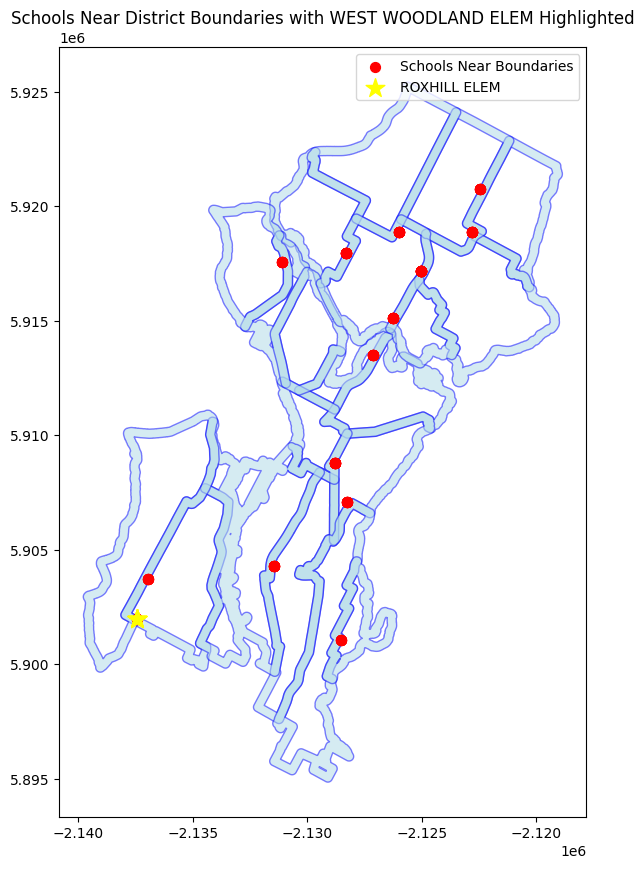

### 5.3. Area (for polygons/multipolygons)

The area attribute calculates the area for polygons and multipolygons in the GeoDataFrame.



In [ ]:
# How to calculate the area of each geometry in the gdf?



<ipython-input-122-592c03e5a831>:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.geometry.area


0     0.001164
1     0.001643
2     0.001188
3     0.000302
4     0.001059
5     0.001802
6     0.000615
7     0.000373
8     0.001290
9     0.001114
10    0.002338
11    0.002122
12    0.001478
13    0.000939
14    0.001729
15    0.000487
16    0.002352
17    0.001835
18    0.001536
19    0.000552
dtype: float64

In [ ]:
# Based on the warning, the proper Coordinate Reference System (CRS) should be a Projected Coordinate System (PCS). Let's change it.



<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

0     21.424010
1     30.168114
2     21.847704
3      5.556693
4     19.460825
5     33.077177
6     11.311795
7      6.852800
8     23.752781
9     20.484446
10    42.939853
11    39.046437
12    27.220390
13    17.270137
14    31.729933
15     8.935596
16    43.180201
17    33.787625
18    28.256964
19    10.149136
dtype: float64

In [ ]:
# How can I calculate the area of each geometry in the gdf and save it in a new column named 'area'?



In [ ]:
# Identify the neighborhood with the largest area.



The neighborhood with the largest area is: West Seattle


## Exercise 7: Compute Area of Each Public School Ground
Prompt: Calculate the area of each neighborhood in which public schools are located, store these values in a new column, and print the average area of these neighborhoods.


Average Area of School Grounds: 0.0


<Projected CRS: EPSG:32616>
Name: WGS 84 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 90°W and 84°W, northern hemisphere between equator and 84°N, onshore and offshore. Belize. Canada - Manitoba; Nunavut; Ontario. Costa Rica. Cuba. Ecuador - Galapagos. El Salvador. Guatemala. Honduras. Mexico. Nicaragua. United States (USA).
- bounds: (-90.0, 0.0, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

0      POINT (-2129662.023 5907081.342)
1      POINT (-2133817.820 5900827.528)
2      POINT (-2121337.121 5919363.037)
3      POINT (-2121319.381 5921541.042)
4      POINT (-2129453.258 5901639.943)
                     ...               
100    POINT (-2130922.697 5901286.638)
101    POINT (-2130360.440 5920015.646)
102    POINT (-2131427.729 5903496.051)
103    POINT (-2125043.646 5917166.827)
104    POINT (-2123375.335 5922893.905)
Name: geometry, Length: 105, dtype: geometry

(105, 18)

(20, 7)

In [ ]:
# Perform spatial join with predicate='contains'


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


SCHOOL       area
0   BALLARD HIGH SCHOOL  11.455039
0           MONROE BLDG  11.455039
0            ADAMS ELEM  11.455039
0               WEBSTER  11.455039
0         LOYAL HEIGHTS  11.455039
..                  ...        ...
18        JOHN MARSHALL  15.108838
18        JOHN MARSHALL  15.108838
18       GREENLAKE ELEM  15.108838
18   DANIEL BAGLEY ELEM  15.108838
19                  NaN   5.427101

[108 rows x 2 columns]

area  SCHOOL
L_HOOD                                
Ballard              11.455039       7
Beacon Hill          16.207539       9
Capitol Hill         11.697222       5
Cascade               2.975980       1
Central Area         10.430100       8
Delridge             17.790966       8
Downtown              6.064299       0
Greater Duwamish     23.069788       1
Interbay              3.669760       0
Lake City            12.668774       5
Magnolia             10.967018       3
North Central        15.108838       9
Northeast            20.858514       9
Northgate            14.524352       7
Northwest            18.037658       4
Queen Anne            9.248499       6
Rainier Valley       17.053933      13
Seward Park           4.799220       1
University District   5.427101       0
West Seattle         23.219524       9

### 5.4. Distance

The distance method calculates the minimum distance between geometries in a GeoDataFrame and a given geometry. Distance is usually calculated in the units of the GeoDataFrame's Coordinate Reference System (CRS).



<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Projected CRS: EPSG:32633>
Name: WGS 84 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°E and 18°E, northern hemisphere between equator and 84°N, onshore and offshore. Austria. Bosnia and Herzegovina. Cameroon. Central African Republic. Chad. Congo. Croatia. Czechia. Democratic Republic of the Congo (Zaire). Gabon. Germany. Hungary. Italy. Libya. Malta. Niger. Nigeria. Norway. Poland. San Marino. Slovakia. Slovenia. Svalbard. Sweden. Vatican City State.
- bounds: (12.0, 0.0, 18.0, 84.0)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

0     POINT (-2643370.166 13768174.607)
1     POINT (-2657705.375 13776924.358)
2     POINT (-2651934.539 13769134.543)
3     POINT (-2650117.183 13770613.159)
4     POINT (-2654285.757 13771281.878)
5     POINT (-2654775.002 13781125.220)
6     POINT (-2651770.977 13772890.159)
7     POINT (-2645996.688 13771671.084)
8     POINT (-2646959.852 13760050.219)
9     POINT (-2643643.734 13771756.300)
10    POINT (-2655171.478 13777834.214)
11    POINT (-2650128.611 13763416.535)
12    POINT (-2644806.014 13761936.426)
13    POINT (-2647782.876 13771127.415)
14    POINT (-2660580.291 13777198.418)
15    POINT (-2660372.088 13775262.006)
16    POINT (-2651879.955 13781400.440)
17    POINT (-2642535.698 13764113.441)
18    POINT (-2646875.018 13767078.231)
19    POINT (-2649799.054 13766350.434)
dtype: geometry

In [ ]:
# How to calculate the distance from each geometry to downtown?
# Define a reference point (longitude, latitude)

# Calculate and store distance from each geometry in the GeoDataFrame to the reference point


In [ ]:
# Find the farthest area from Downtown?
# Find the index of the maximum distance

# Retrieve the corresponding neighborhood


The neighborhood farthest from the reference point is: Lake City


0      9633.798158
1      7175.780890
2      3759.176625
3      2814.208080
4      2985.077427
5      8765.865128
6         0.000000
7      5901.572591
8     13711.710311
9      8205.956741
10     6000.589747
11     9614.931942
12    12980.562299
13     4360.299900
14     9806.380168
15     8922.149685
16     8510.978553
17    12740.532849
18     7599.271270
19     6830.555938
Name: dist_to_downtown, dtype: float64

## Exercise 8:

Calculate Distance from Each School to the Nearest District Center in Kilometers


SCHOOL  nearest_center_distance_km
0           BEACON HILL ELEM                    2.969340
1               CONCORD ELEM                    3.349840
2    NATHAN HALE HIGH SCHOOL                    0.799439
3         OLYMPIC HILLS ELEM                    1.539557
4                 AKI KUROSE                    0.988021
..                       ...                         ...
100          VAN ASSELT ELEM                    1.692298
101                  WEBSTER                    1.051915
102    CLEVELAND HIGH SCHOOL                    1.035163
103            JOHN MARSHALL                    1.932570
104     INGRAHAM HIGH SCHOOL                    1.866388

[105 rows x 2 columns]

# 6. Aggregation with Dissolve


Spatial data are often more granular than we need. Sometimes, we need to aggregate them. For example, if you have information about cities, but you are actually interested in studying at the level of countries, you can use the dissolve() method to aggregate the geometric features.

For non-spatial setting, we can use two approaches as simple (sum, mean, etc.) or advanced (such as groupby). But for spatial data we can only use dissolve() method for aggregating geometric features.

**dissolve() contains three steps in the backend:**

     1. Step 1: dissolving all the geometrics within a given group togather into a single geometric feature (using geopandas.GeoSeries.unary_union)
     2. Step 2: aggregating all the rows (non-spatial) of the data by groupby.aggregate() method
     3. Step 3: Combining results of step 1 and stap 2


![image.png](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/agg_geometry.png)

OBJECTID           TYPE                   SCHOOL            ADDRESS  \
0         1     Elementary         BEACON HILL ELEM   2025 14th Ave. S   
1         2     Elementary             CONCORD ELEM  723 S Concord St.   
2         3    High School  NATHAN HALE HIGH SCHOOL  10750 30th Ave NE   
3         4     Elementary       OLYMPIC HILLS ELEM  13018 20th Ave NE   
4         5  Middle School               AKI KUROSE   3928 S Graham St   

  SE_ANNO_CAD_DATA               NAME GRADE     CITY    ZIP           PHONE  \
0             None  Beacon Hill Int'l   K-5  Seattle  98144  (206) 252-2700   
1             None      Concord Int'l   K-5  Seattle  98108  (206) 252-8100   
2             None        Nathan Hale  9-12  Seattle  98125   (206)252-3680   
3             None      Olympic Hills   K-5  Seattle  98125   (206)413-2200   
4             None         Aki Kurose   6-8  Seattle  98118   (206)252-7700   

                                     WEBSITE        XCOORD         YCOORD  \
0    http://beaconhilles.seattleschools.org/  1.274761e+06  217081.839912   
1       http://concordes.seattleschools.org/  1.271958e+06  194568.029953   
2          http://halehs.seattleschools.org/  1.280683e+06  261536.279874   
3  http://olympichillses.seattleschools.org/  1.277786e+06  267449.850068   
4        http://kurosems.seattleschools.org/  1.282665e+06  202649.160116   

  SITE_USE PRJ_ENRLLMNT                     geometry  Group  
0   Active         None  POINT (-122.31510 47.58547)      0  
1   Active         None  POINT (-122.32469 47.52361)      0  
2   Active         None  POINT (-122.29453 47.70763)      0  
3   Active         None  POINT (-122.30676 47.72369)      0  
4   Active         None  POINT (-122.28198 47.54632)      0

In [ ]:
# Aggregate the information of schools based on their group value?



geometry  OBJECTID
Group                                                             
0      MULTIPOINT (-122.40783 47.57714, -122.39689 47...        74
1      MULTIPOINT (-122.39926 47.64226, -122.39631 47...        31

<Axes: >

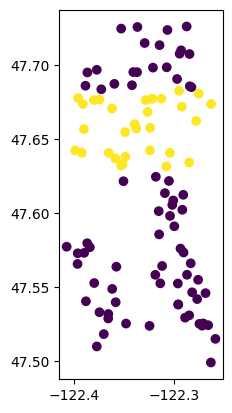

Index(['OBJECTID_left', 'TYPE', 'SCHOOL', 'ADDRESS', 'SE_ANNO_CAD_DATA',
       'NAME', 'GRADE', 'CITY', 'ZIP', 'PHONE', 'WEBSITE', 'XCOORD', 'YCOORD',
       'SITE_USE', 'PRJ_ENRLLMNT', 'geometry', 'Group', 'index_right',
       'OBJECTID_right', 'L_HOOD', 'S_HOOD_ALT_NAMES', 'Shape__Area',
       'Shape__Length', 'geometry_pcs'],
      dtype='object')

Group
0        74
1        31
Name: count, dtype: int64

In [ ]:
# Aggregate the joined_gdf GeoDataFrame to show the count of schools for each 'Type' and 'Group'



/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1793: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc, **kwargs)


(55, 3)

geometry  \
L_HOOD           TYPE                                                                    
Ballard          Elementary          MULTIPOINT (-122.39152 47.67363, -122.38897 47...   
                 High School                               POINT (-122.37489 47.67661)   
                 Option Elementary   MULTIPOINT (-122.39631 47.67767, -122.38051 47...   
Beacon Hill      Elementary          MULTIPOINT (-122.31890 47.55813, -122.31510 47...   
                 Middle School                             POINT (-122.31208 47.56413)   
                 Option High School                        POINT (-122.31391 47.55237)   
                 Service School                            POINT (-122.29591 47.53809)   
Capitol Hill     Elementary          MULTIPOINT (-122.31838 47.62442, -122.30786 47...   
                 Middle School                             POINT (-122.30524 47.62160)   
Cascade          Option Elementary                         POINT (-122.32418 47.64229)   
Central Area     Elementary          MULTIPOINT (-122.31548 47.60120, -122.29985 47...   
                 High School                               POINT (-122.30190 47.60542)   
                 Middle School                             POINT (-122.30415 47.59796)   
                 Service School      MULTIPOINT (-122.30929 47.61337, -122.30093 47...   
Delridge         Elementary          MULTIPOINT (-122.37493 47.53284, -122.35866 47...   
                 High School                               POINT (-122.36615 47.52863)   
                 Middle School                             POINT (-122.36604 47.53165)   
                 Option Elementary   MULTIPOINT (-122.36214 47.54862, -122.35800 47...   
                 Service School                            POINT (-122.37056 47.51805)   
Greater Duwamish Elementary                                POINT (-122.32469 47.52361)   
Lake City        Elementary          MULTIPOINT (-122.30676 47.72369, -122.28463 47...   
                 High School                               POINT (-122.29453 47.70763)   
                 Middle School                             POINT (-122.29301 47.70994)   
                 Option Elementary                         POINT (-122.28747 47.72606)   
Magnolia         Elementary          MULTIPOINT (-122.39926 47.64226, -122.39262 47...   
North Central    Elementary          MULTIPOINT (-122.34912 47.65464, -122.34230 47...   
                 High School                               POINT (-122.33962 47.65996)   
                 Middle School                             POINT (-122.33803 47.65708)   
                 Option Elementary   MULTIPOINT (-122.32660 47.66828, -122.32405 47...   
                 Service School                            POINT (-122.32232 47.67725)   
Northeast        Elementary          MULTIPOINT (-122.29705 47.69054, -122.29221 47...   
                 High School                               POINT (-122.31281 47.67723)   
                 Middle School                             POINT (-122.29498 47.68252)   
                 Option Elementary                         POINT (-122.28430 47.68566)   
Northgate        Elementary          MULTIPOINT (-122.32959 47.71487, -122.32126 47...   
                 High School                               POINT (-122.33684 47.72570)   
                 Middle School                             POINT (-122.34098 47.69524)   
                 Option Elementary   MULTIPOINT (-122.33720 47.69518, -122.31466 47...   
Northwest        Elementary          MULTIPOINT (-122.38704 47.69497, -122.35996 47...   
                 Middle School                             POINT (-122.37760 47.69675)   
Queen Anne       Elementary          MULTIPOINT (-122.36560 47.64052, -122.35172 47...   
                 Middle School                             POINT (-122.35896 47.63683)   
                 NonStandard                               POINT (-122.35327 47.63202)   
                 Option Elem

(105, 24)

TYPE
L_HOOD           TYPE                    
Ballard          Elementary             4
                 High School            1
                 Option Elementary      2
Beacon Hill      Elementary             6
                 Middle School          1
                 Option High School     1
                 Service School         1
Capitol Hill     Elementary             4
                 Middle School          1
Cascade          Option Elementary      1
Central Area     Elementary             4
                 High School            1
                 Middle School          1
                 Service School         2
Delridge         Elementary             3
                 High School            1
                 Middle School          1
                 Option Elementary      2
                 Service School         1
Greater Duwamish Elementary             1
Lake City        Elementary             2
                 High School            1
                 Middle School          1
                 Option Elementary      1
Magnolia         Elementary             3
North Central    Elementary             4
                 High School            1
                 Middle School          1
                 Option Elementary      2
                 Service School         1
Northeast        Elementary             6
                 High School            1
                 Middle School          1
                 Option Elementary      1
Northgate        Elementary             3
                 High School            1
                 Middle School          1
                 Option Elementary      2
Northwest        Elementary             3
                 Middle School          1
Queen Anne       Elementary             2
                 Middle School          1
                 NonStandard            1
                 Option Elementary      1
                 Option High School     1
Rainier Valley   Elementary             6
                 High School            2
                 Middle School          1
                 Option Elementary      2
                 Option High School     1
                 Service School         1
Seward Park      Elementary             1
West Seattle     Elementary             7
                 High School            1
                 Middle School          1

# Refernces

1. https://geopandas.org/
2. https://medium.com/@haniszulaikha/starter-tutorial-on-geopandas-d3ede5cc16e9
3. https://github.com/jorisvandenbossche/geopandas-tutorial
4. https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/coordinate-systems-difference/
5. https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::public-schools/explore?location=47.612244%2C-122.333200%2C11.96